# NAIVE BAYES CLASSIFICATION OF CATEGORIES OF THE SALARY :
1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [5]:
Traindata = pd.read_csv("SalaryData_Train(1).csv.crdownload")
Traindata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
Traindata.shape   # 29k line items of training set

(29889, 14)

In [85]:
#LOAD THE TEST DATASET

Testdata = pd.read_csv("SalaryData_Test(1).csv")
Testdata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [15]:
Testdata.shape  # 15k of test data

(15060, 14)

In [10]:
# COMBINING THE TRAIN AND TEST DATA
alldata = Traindata.append(Testdata)
alldata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
alldata.reset_index(inplace=True,drop=True)

In [12]:
alldata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
alldata.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,44949.000000,44949.000000,44949.000000,44949.000000,44949.000000
mean,38.540524,10.119736,1102.648668,88.565063,40.932635
std,13.214313,2.551261,7511.500032,404.917605,12.006237
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [19]:
# numerical_features = [age capitalgain capitalloss hoursperweek]
# categorical_features = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [20]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44949 entries, 0 to 44948
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            44949 non-null  int64 
 1   workclass      44949 non-null  object
 2   education      44949 non-null  object
 3   educationno    44949 non-null  int64 
 4   maritalstatus  44949 non-null  object
 5   occupation     44949 non-null  object
 6   relationship   44949 non-null  object
 7   race           44949 non-null  object
 8   sex            44949 non-null  object
 9   capitalgain    44949 non-null  int64 
 10  capitalloss    44949 non-null  int64 
 11  hoursperweek   44949 non-null  int64 
 12  native         44949 non-null  object
 13  Salary         44948 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


# Exploring categorical columns

In [22]:
categorical_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

categorical_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

for i in categorical_columns:
    unique_counts = alldata[i].value_counts()
    print(f"Column: {i}")
    print(unique_counts)
    print()
    
    
''' Inference : Spread of the Data has various no of uneven counts for each catergories in every categorical column'''

Column: workclass
 Private             33091
 Self-emp-not-inc     3779
 Local-gov            3079
 State-gov            1937
 Self-emp-inc         1642
 Federal-gov          1400
 Without-pay            21
Name: workclass, dtype: int64

Column: education
 HS-grad         14697
 Some-college     9844
 Bachelors        7532
 Masters          2497
 Assoc-voc        1947
 11th             1610
 Assoc-acdm       1496
 10th             1214
 7th-8th           814
 Prof-school       781
 9th               671
 12th              570
 Doctorate         539
 5th-6th           448
 1st-4th           219
 Preschool          70
Name: education, dtype: int64

Column: maritalstatus
 Married-civ-spouse       20926
 Never-married            14526
 Divorced                  6251
 Separated                 1402
 Widowed                   1267
 Married-spouse-absent      545
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

Column: occupation
 Prof-specialty       5973
 Craft-repair     

' Inference : Data has various no of uneven counts for each catergories in every categorical column'

In [42]:
#UNDERSTADNING CATEGORICAL FEATURES

categorical_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

for i in categorical_columns:
    
    print(i, ' contains ', len(alldata[i].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  41  labels


In [24]:
alldata["Salary"].value_counts()

 <=50K    33799
 >50K     11149
Name: Salary, dtype: int64

In [ ]:
# TYPE A : 33K  ;  TYPE B CLASS 11K

''' The data has imbalanced classes with salary less than 50k over 33k and salary greater than 50 over 11k counts'''


In [52]:
countunder50 = len(alldata[alldata.Salary == ' <=50K'])
countover50 = len(alldata[alldata.Salary == ' >50K'])
total = len(alldata.Salary)

In [54]:
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countover50 / total *100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countunder50 / total *100)))

Percentage of Employees with Salary greater than 50k: 24.80%
Percentage of Employees with Salary lesser than 50k: 75.19%


In [25]:
#LET US CHECK FOR DUPLICATED VALUES 

alldata[alldata.duplicated()]   # AS WE HAVE MERGED TRAINING AND TESTING DATASET

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
44938,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
44941,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
44942,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [27]:
alldata.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

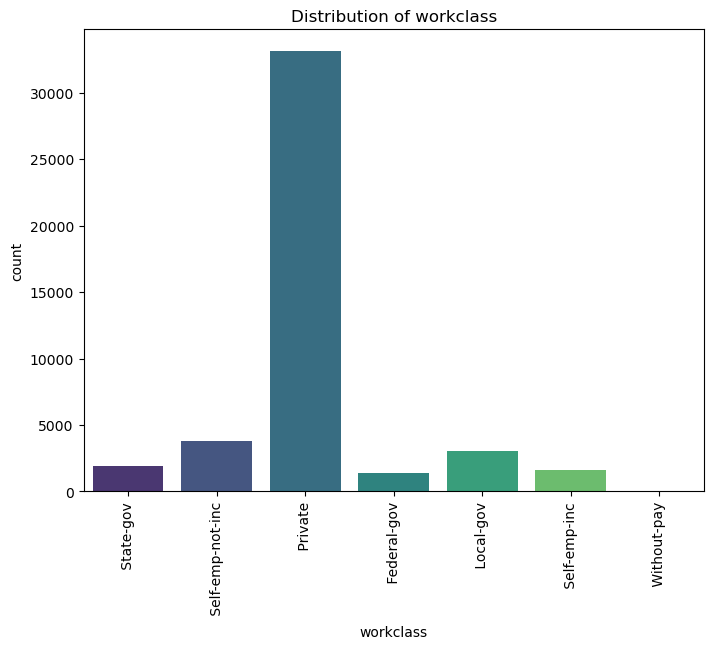

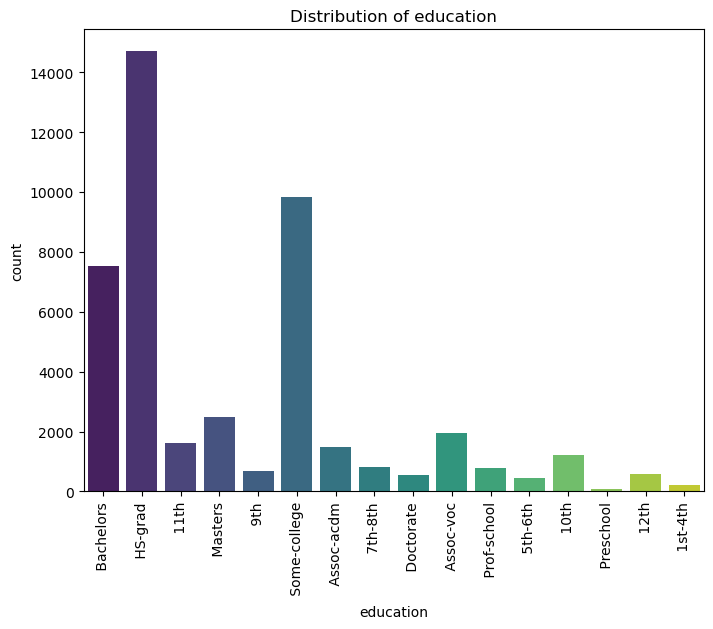

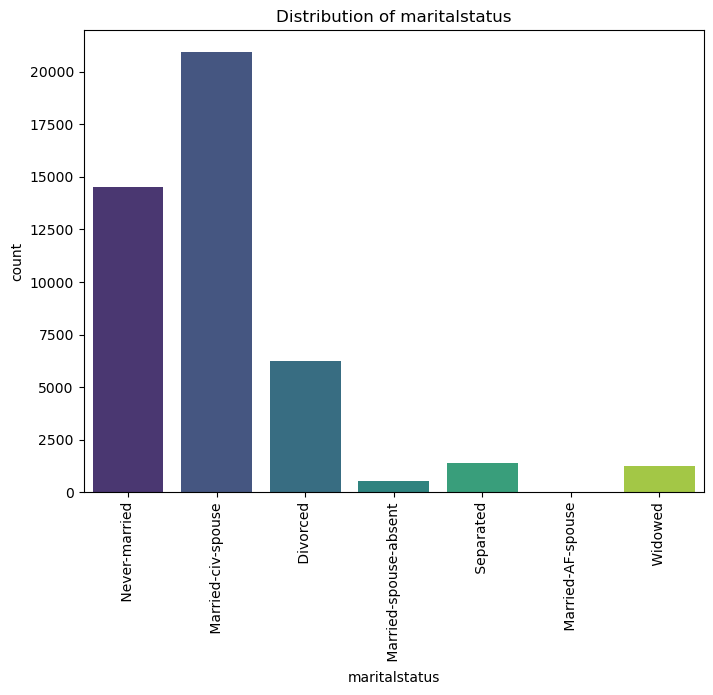

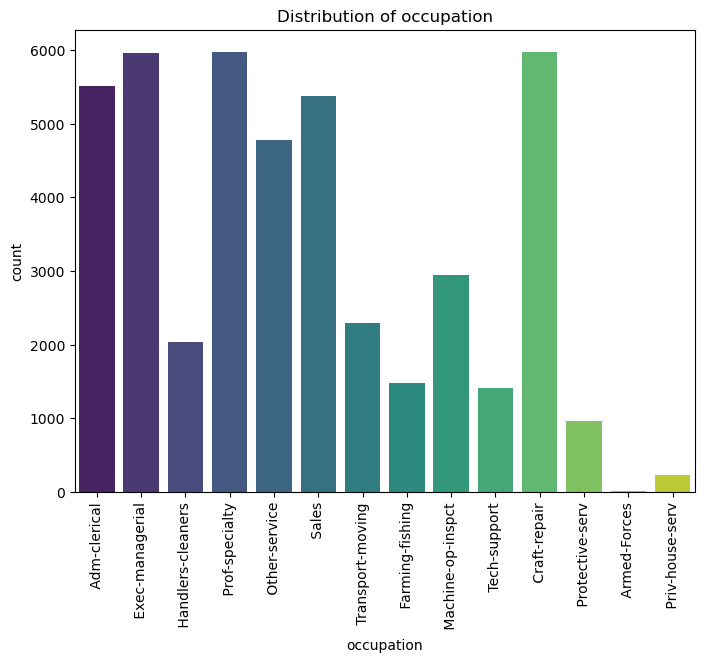

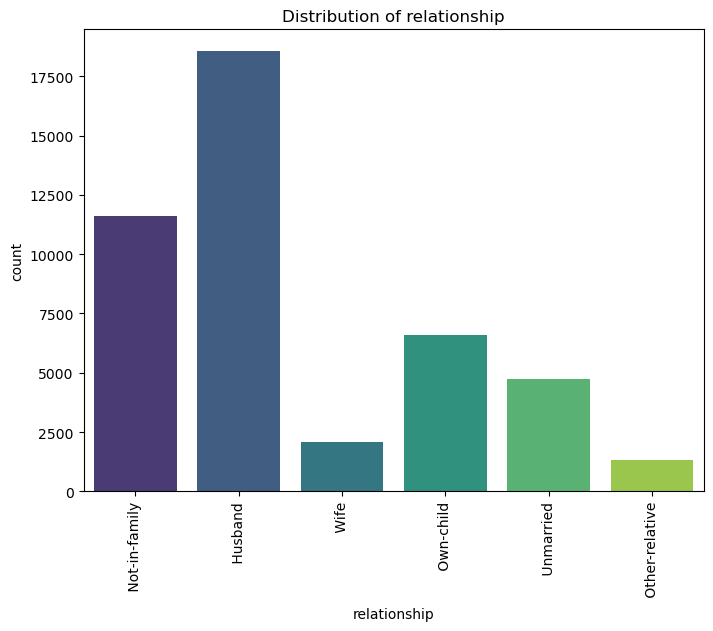

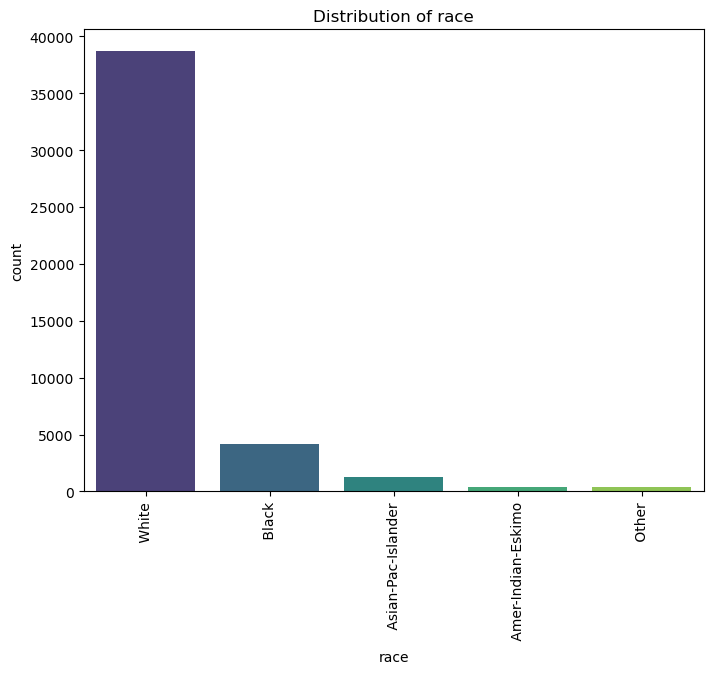

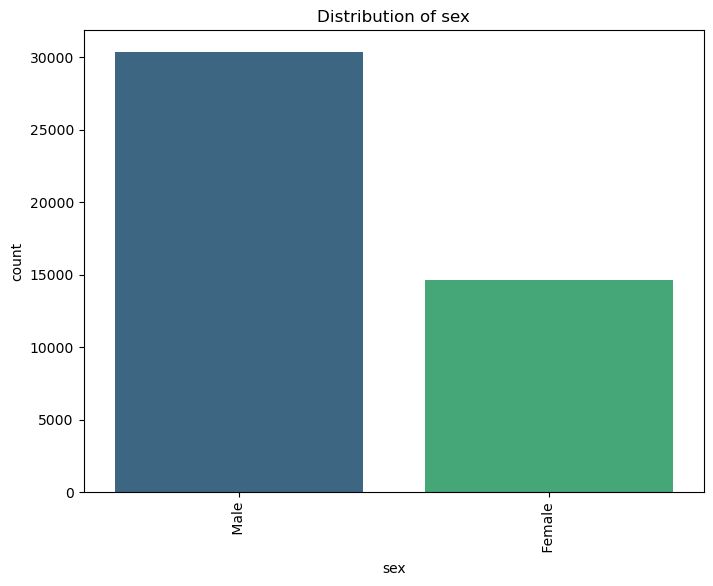

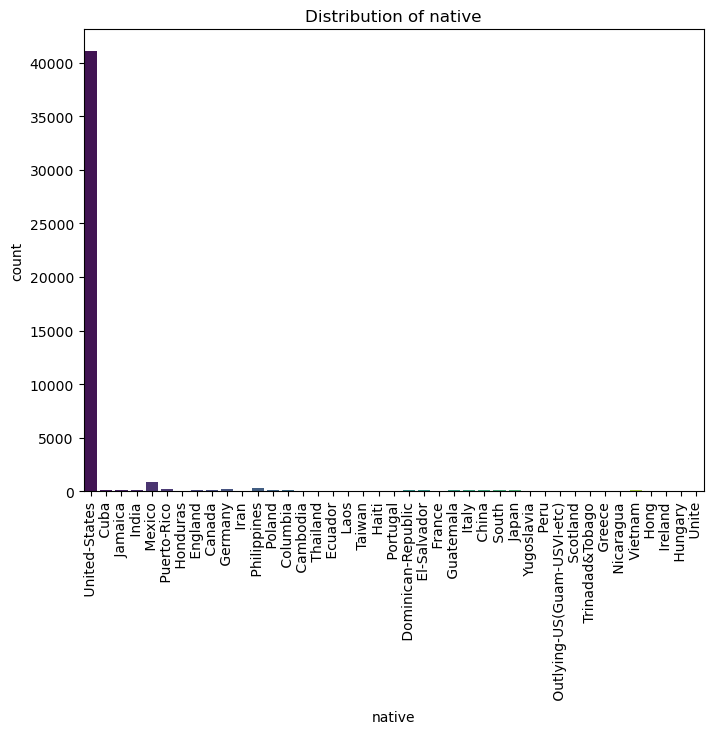

In [48]:
for i in categorical_columns:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=i, data=alldata, palette='viridis')
    plt.title(f'Distribution of {i}')  
    plt.xticks(rotation=90)  
    plt.show()  

In [ ]:
''' By this we can visualise which class of catrgories is majority in each categorical features'''

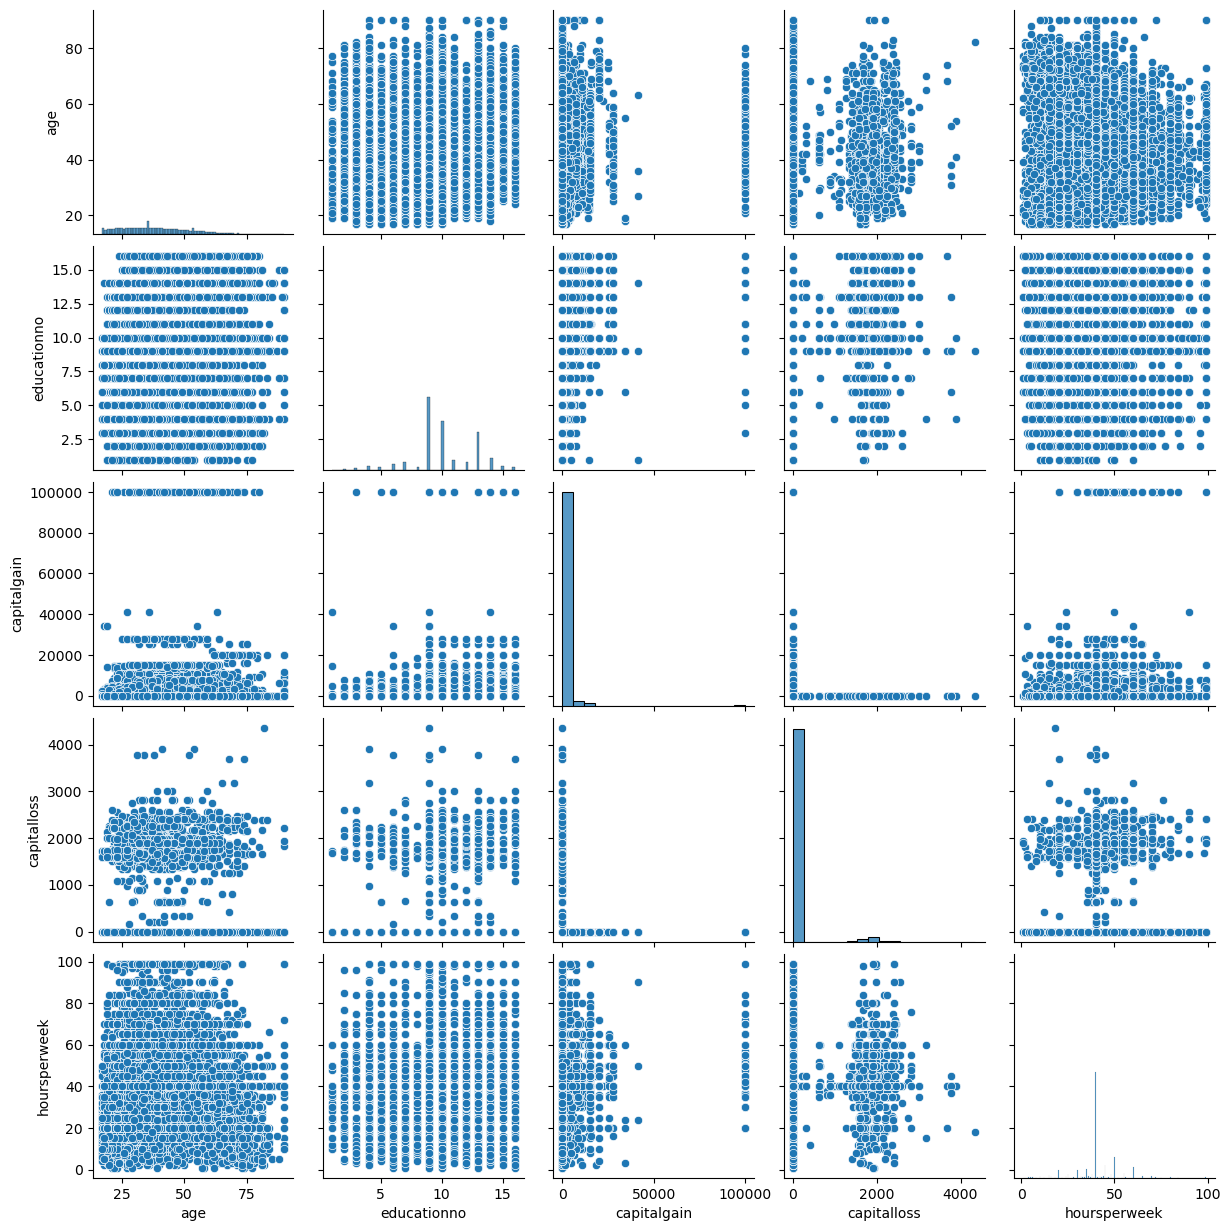

In [29]:
#UNDERSTADNING NUMERICAL FEATURES


''' Inference : There is no significant relation between the features '''

sns.pairplot(data=alldata)


<Axes: >

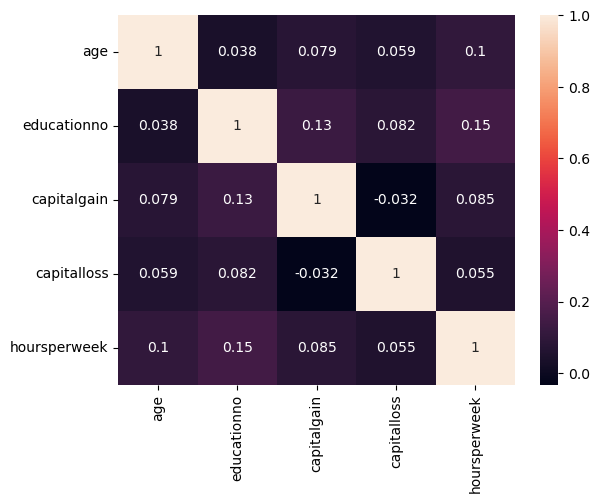

In [31]:
sns.heatmap(data= alldata.corr(),annot=True)  


# None of the numerical features are correlated to each other 

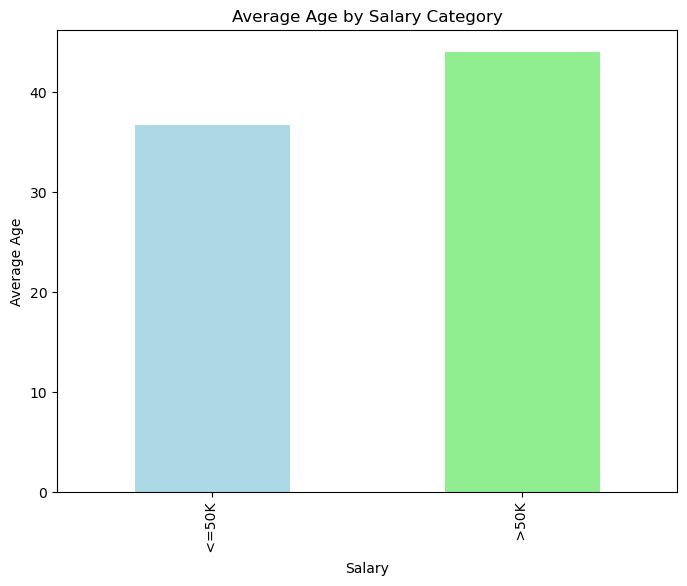

In [35]:
# HOW EACH NUMERICAL FEATURES AFFECTS THE TARGET VARIABLE 

age_by_salary = alldata.groupby("Salary")["age"].mean()

plt.figure(figsize=(8, 6))
age_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average Age")
plt.title("Average Age by Salary Category");

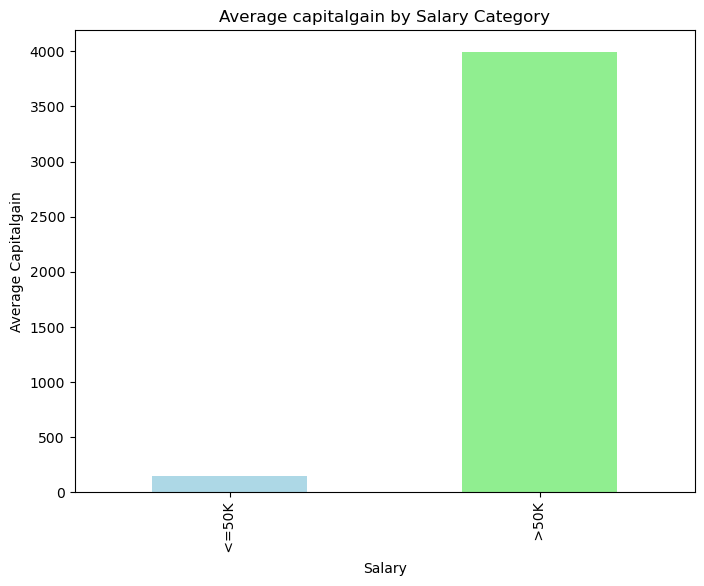

In [36]:
capitalgain_by_salary = alldata.groupby("Salary")["capitalgain"].mean()

plt.figure(figsize=(8, 6))
capitalgain_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average Capitalgain")
plt.title("Average capitalgain by Salary Category");

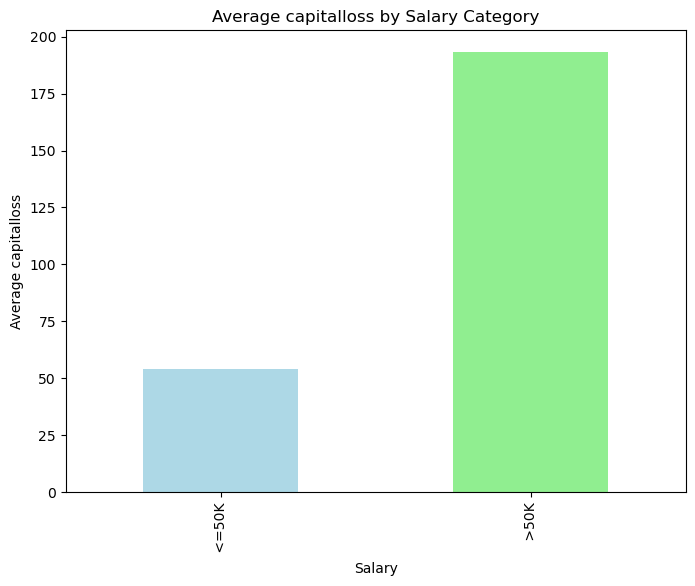

In [40]:
capitalloss_by_salary = alldata.groupby("Salary")["capitalloss"].mean()

plt.figure(figsize=(8, 6))
capitalloss_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average capitalloss")
plt.title("Average capitalloss by Salary Category");

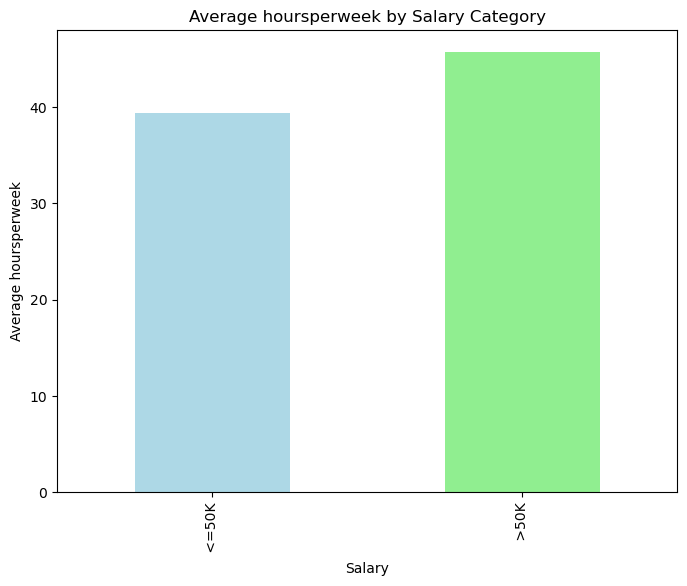

In [39]:
hoursperweek_by_salary = alldata.groupby("Salary")["hoursperweek"].mean()

plt.figure(figsize=(8, 6))
hoursperweek_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average hoursperweek")
plt.title("Average hoursperweek by Salary Category");

In [ ]:
'''Skewness measures the asymmetry of a distribution. In a perfectly symmetrical distribution,
the skewness is zero. Positive skewness indicates a distribution that is skewed to the right, meaning 
that the right tail is longer or fatter than the left. Negative skewness indicates a distribution that is 
skewed to the left'''


'''Kurtosis measures the "tailedness" of a distribution. It describes the sharpness of the peak (or lack thereof) 
and the heaviness of the tails. A normal distribution has a kurtosis of 3 (referred to as mesokurtic).
A distribution with positive kurtosis (greater than 3) has heavier tails and a sharper peak,
while a distribution with negative kurtosis (less than 3) has lighter tails and a flatter peak'''



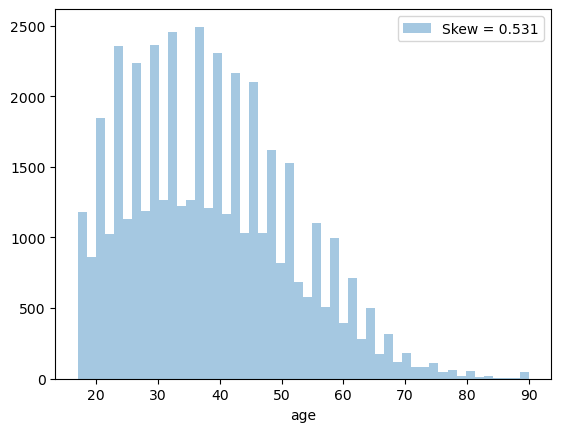

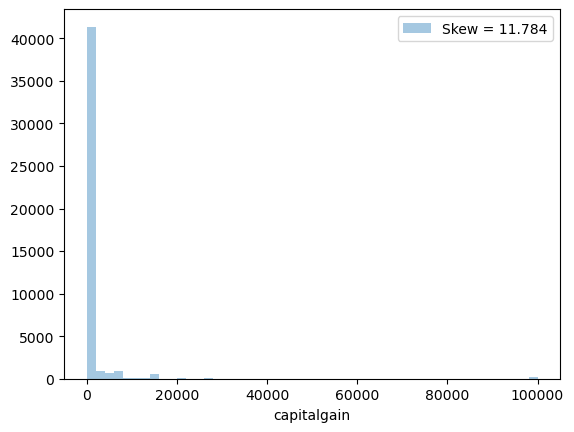

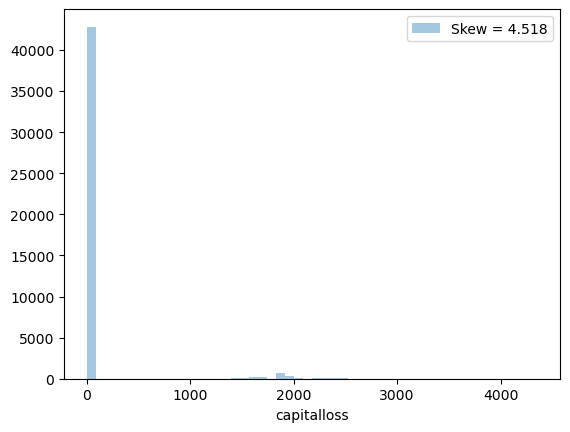

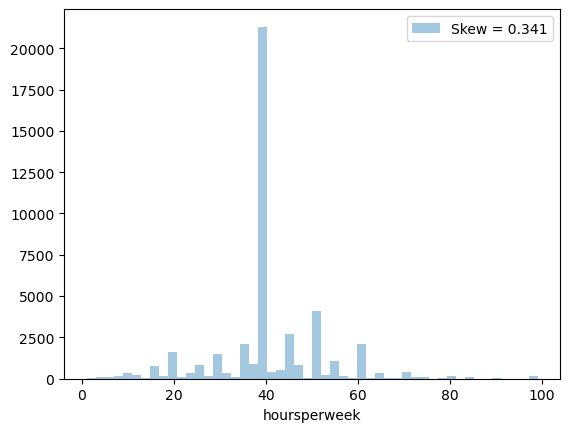

In [47]:
numerical_columns = ['age', 'capitalgain','capitalloss','hoursperweek']

for i in numerical_columns:
        skew = alldata[i].skew()
        sns.distplot(alldata[i],kde=False,label = 'Skew = %.3f'%(skew))
        plt.legend(loc='best')
        plt.show()


In [ ]:
''' ALL THE FEATURES ARE RIGHT SKEWED , HOURSPERWEEK HAS SKEWNESS NEARING 0 MEANING THAT THE DISTRIBUTION IS NEARING NORMALITY

# Data Preprocessing

In [55]:
# BUILDING AND PREPING THE MODEL ON TRAIN DATA
data = Traindata.copy()


In [56]:
data.drop('Salary',axis=1,inplace=True)

In [57]:
data = pd.get_dummies(data.iloc[:,:])
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ Unite,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data['Salary'] = Traindata.Salary
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ Unite,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [59]:
x = data.iloc[:,:-1]
y = data["Salary"]

In [63]:
x.isnull().sum()

age                        0
educationno                0
capitalgain                0
capitalloss                0
hoursperweek               0
                          ..
native_ Trinadad&Tobago    0
native_ Unite              0
native_ United-States      0
native_ Vietnam            0
native_ Yugoslavia         0
Length: 103, dtype: int64

In [64]:
x.isna().sum()

age                        0
educationno                0
capitalgain                0
capitalloss                0
hoursperweek               0
                          ..
native_ Trinadad&Tobago    0
native_ Unite              0
native_ United-States      0
native_ Vietnam            0
native_ Yugoslavia         0
Length: 103, dtype: int64

In [67]:
nb_label = Traindata.copy() 

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [71]:
Traindata["education"]=label_encoder.fit_transform(Traindata["education"])
Traindata["workclass"]=label_encoder.fit_transform(Traindata["workclass"])
Traindata["maritalstatus"]=label_encoder.fit_transform(Traindata["maritalstatus"])
Traindata["sex"]=label_encoder.fit_transform(Traindata["sex"])
Traindata["race"]=label_encoder.fit_transform(Traindata["race"])
Traindata["occupation"]=label_encoder.fit_transform(Traindata["occupation"])
Traindata["relationship"]=label_encoder.fit_transform(Traindata["relationship"])
Traindata["native"]=label_encoder.fit_transform(Traindata["native"])
Traindata['Salary'] = np.where(Traindata['Salary'].str.contains(" >50K"), 1, 0)

In [72]:
Traindata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [73]:
from sklearn.naive_bayes import CategoricalNB  # for categrocal classification 

clf = CategoricalNB()

In [76]:
x_train = Traindata.iloc[:,:-1]
y_train = Traindata["Salary"]

In [77]:
clf.fit(x_train,y_train)

CategoricalNB()

In [ ]:
# PREDING WITH TEST DATA

In [86]:
Testdata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [87]:
Testdata["education"]=label_encoder.fit_transform(Testdata["education"])
Testdata["workclass"]=label_encoder.fit_transform(Testdata["workclass"])
Testdata["maritalstatus"]=label_encoder.fit_transform(Testdata["maritalstatus"])
Testdata["sex"]=label_encoder.fit_transform(Testdata["sex"])
Testdata["race"]=label_encoder.fit_transform(Testdata["race"])
Testdata["occupation"]=label_encoder.fit_transform(Testdata["occupation"])
Testdata["relationship"]=label_encoder.fit_transform(Testdata["relationship"])
Testdata["native"]=label_encoder.fit_transform(Testdata["native"])
Testdata['Salary'] = np.where(Testdata['Salary'].str.contains(" >50K"), 1, 0)

In [88]:
x_test = Testdata.iloc[:,:-1]
y_test = Testdata["Salary"]

In [89]:
pred = clf.predict(x_test)

In [92]:
from sklearn.metrics import *


In [94]:
print(accuracy_score(y_test, pred))

0.8230411686586986


In [95]:
pred1 = clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred1, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred1) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred1)}\n")

Train Result:
Accuracy Score: 85.72%
_______________________________________________
Confusion Matrix: 
 [[20706  1733]
 [ 2536  4914]]



In [96]:
pred2 = clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred2, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred2) * 100:.2f}%")
print("_______________________________________________")

Train Result:
Accuracy Score: 82.30%
_______________________________________________


In [ ]:
'''DIFFERENT TYPES OF NB l :
    
Gaussian Naive Bayes: Suitable for continuous data, assumes a Gaussian distribution of features. 
        Commonly used in real-valued feature spaces.

Multinomial Naive Bayes: Suitable for discrete data, often used in text classification where features 
    represent word frequencies (counts).

Bernoulli Naive Bayes: Suitable for binary data, often used in text classification where features 
    represent the presence or absence of words.
    
We cannot use Gaussian as its for continous data , our data has more of discrete and categorical features and so it is with 
multinomial , let us try Bernoulli NB '''



In [98]:
from sklearn.naive_bayes import BernoulliNB

clf2 = BernoulliNB()


In [99]:
clf2.fit(x_train,y_train)

BernoulliNB()

In [100]:
pred2 = clf2.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred2, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred2) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred2)}\n")

Train Result:
Accuracy Score: 72.58%
_______________________________________________
Confusion Matrix: 
 [[16299  6140]
 [ 2057  5393]]



In [101]:
pred3 = clf2.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred3, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred3) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred3)}\n")

Train Result:
Accuracy Score: 72.84%
_______________________________________________
Confusion Matrix: 
 [[8280 3080]
 [1010 2690]]



# Thus the model performs well in categorical NB with performance of 82.30%